In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime  

train=pd.read_csv('/home/sahil/ python ml/competitive-data-science-predict-future-sales/sales_train.csv')
test=pd.read_csv('/home/sahil/ python ml/competitive-data-science-predict-future-sales/test.csv')
shop=pd.read_csv('/home/sahil/ python ml/competitive-data-science-predict-future-sales/shops.csv')
item=pd.read_csv('/home/sahil/ python ml/competitive-data-science-predict-future-sales/items.csv')
train.describe()
test.head

<bound method NDFrame.head of             ID  shop_id  item_id
0            0        5     5037
1            1        5     5320
2            2        5     5233
3            3        5     5232
4            4        5     5268
...        ...      ...      ...
214195  214195       45    18454
214196  214196       45    16188
214197  214197       45    15757
214198  214198       45    19648
214199  214199       45      969

[214200 rows x 3 columns]>

In [2]:
print("shape",train.shape)
print("shape",test.shape)
print("shape",shop.shape)
print("shape",item.shape)

shape (2935849, 6)
shape (214200, 3)
shape (60, 2)
shape (22170, 3)


In [3]:
print("null value",train.isnull().sum().sum())
print("null value",test.isnull().sum().sum())
print("null value",item.isnull().sum().sum())
print("null value",shop.isnull().sum().sum())
item.info()

null value 0
null value 0
null value 0
null value 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


/home/sahil/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


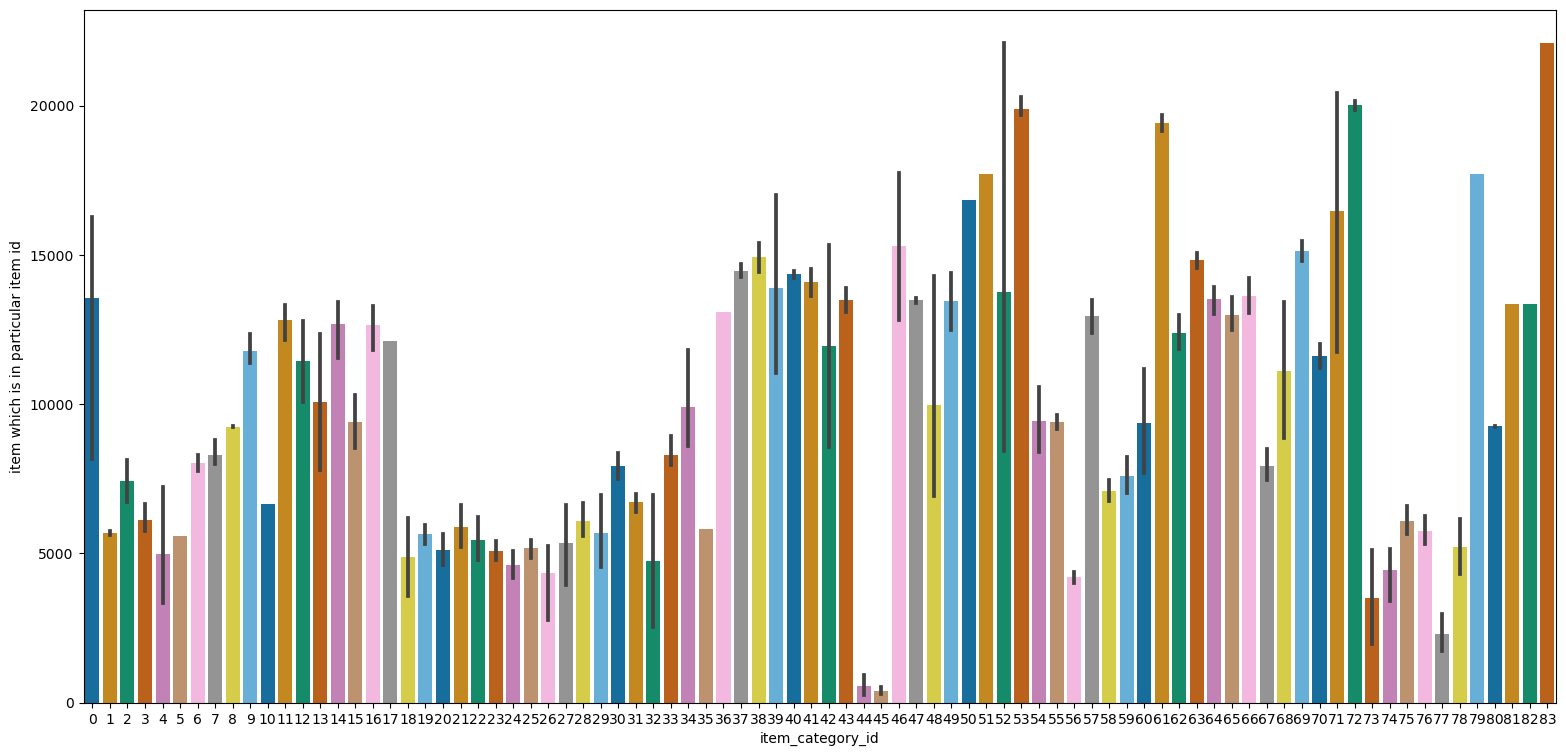

In [4]:

plt.rcParams['figure.figsize'] = (19, 9)
#sns.barplot(item['item_category_id'], item['item_name'],palette = 'colorblind')
x=item['item_category_id']
y=item['item_id']
sns.barplot(x, y, palette = 'colorblind')
plt.xlabel('item_category_id')
plt.ylabel('item which is in particular item id')
plt.show()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


/home/sahil/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


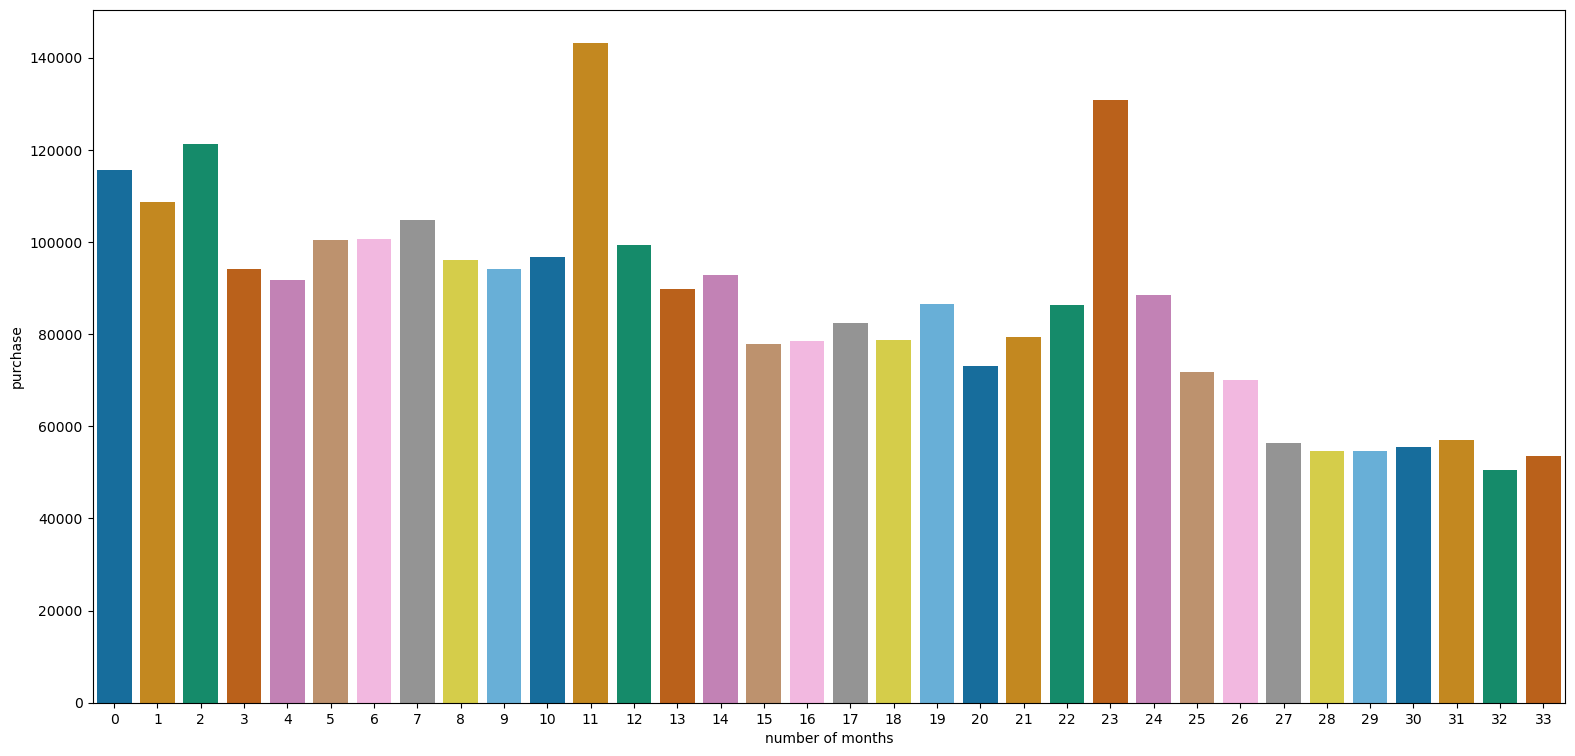

In [6]:
plt.rcParams['figure.figsize'] = (19, 9)
#sns.barplot(item['item_category_id'], item['item_name'],palette = 'colorblind')
sns.countplot(train['date_block_num'], palette = 'colorblind')
#sns.countplot(train['date_block_num'])
plt.xlabel('number of months')
plt.ylabel('purchase')
plt.show()

In [7]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [8]:
train.head(50)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [9]:
print("number of unique items" ,train['item_id'].nunique())
#x = train['item_id'].nunique()

number of unique items 21807


In [10]:
train.shape

(2935849, 6)

In [11]:
item.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [12]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


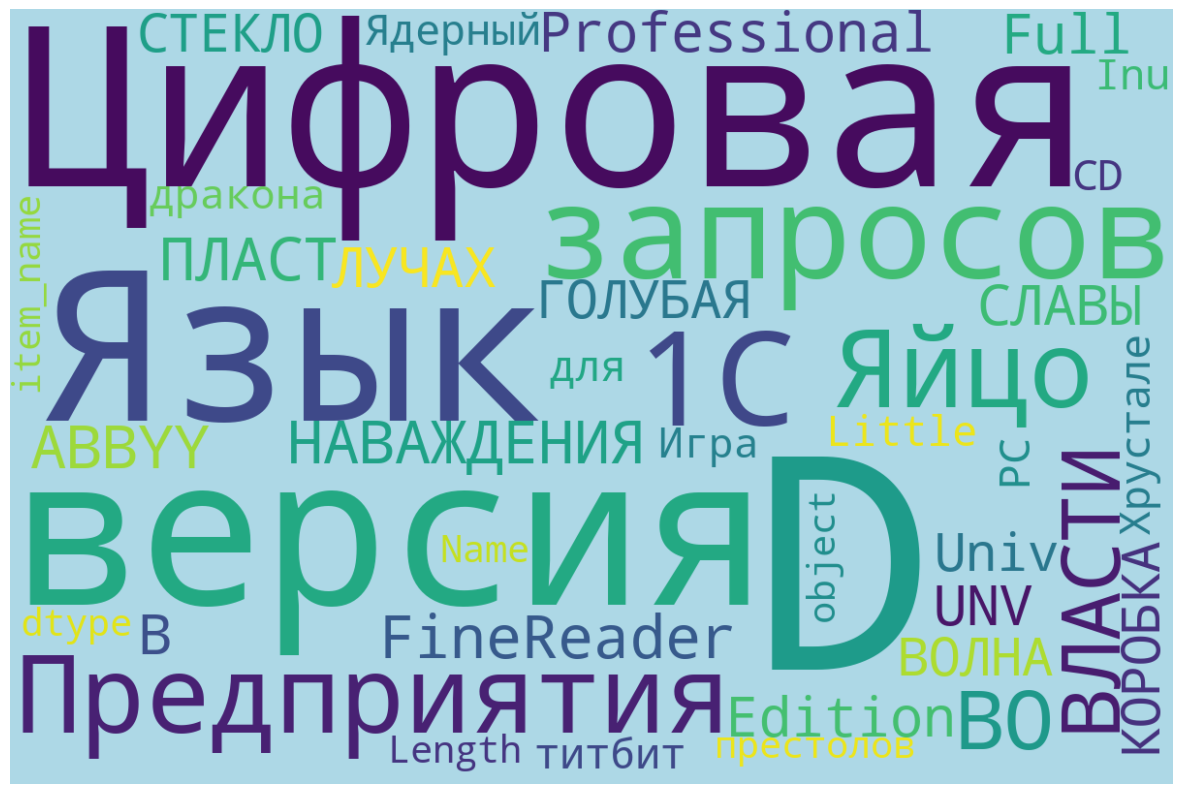

In [13]:
#from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud
plt.rcParams['figure.figsize']=(15,12)

#plt.rcParams['figure.figsize'] = (15, 12)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color='lightblue',
                     stopwords=stopwords,
                     max_words=200,
                     width=1200,
                     height=800,
                     #width = 1200,
                     #height = 800,
                    random_state = 42
                 ).generate(str(item['item_name']))
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

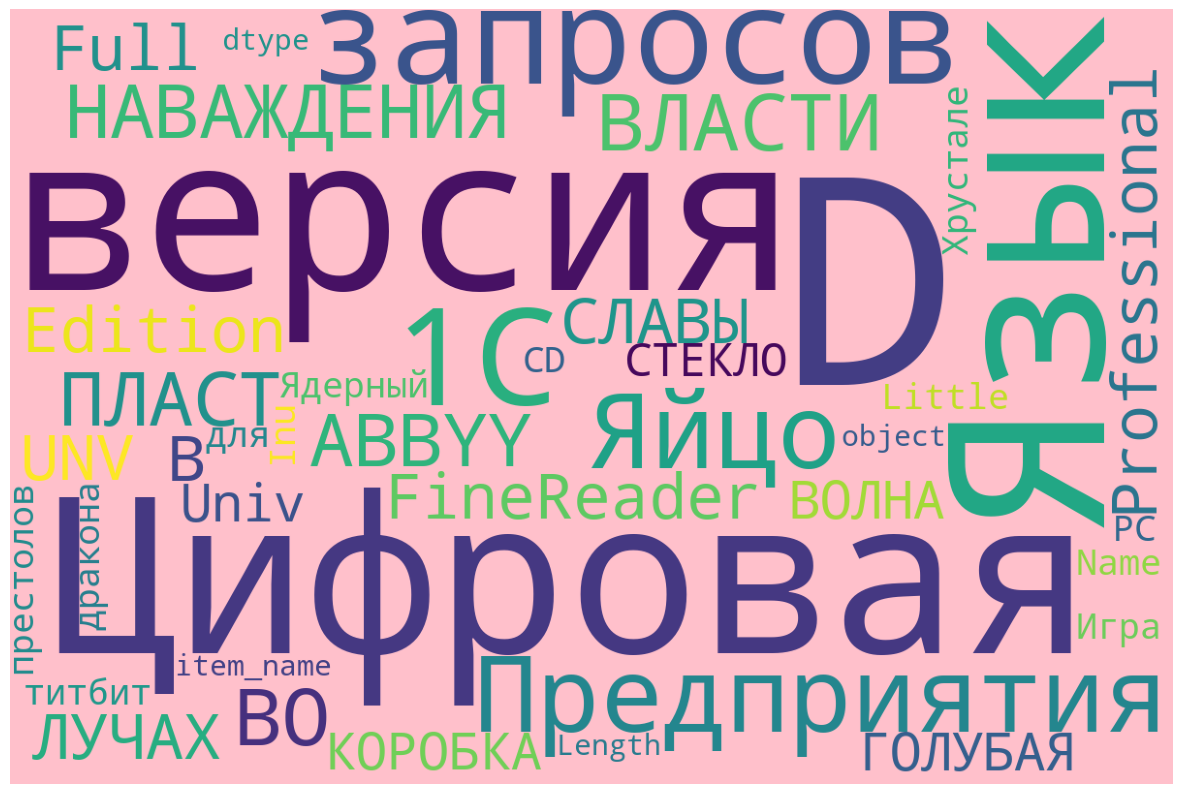

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
plt.rcParams['figure.figsize']=(15,12)

stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color='pink',
                   max_words=200,
                   width=1200,
                   height=800,
                    stopwords=stopwords,
                   ).generate(str(item['item_name']))
plt.axis('off')
plt.imshow(wordcloud)

In [15]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [16]:
#train['day']=train['date'].dt.day
#train['day'] = pd.to_datetime(train['date'],infer_datetime_format=True, utc=True, errors='ignore')
#df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, utc=True, errors='ignore')
#train['day']=pd.to_datetime(train['date'], errors='coerce')
#train['day'] = train['date'].dt.day
#train['month']=train['date']
#train['month'] = pd.to_datetime(train['date'],infer_datetime_format=True, utc=True, errors='ignore')
#train['month']=pd.to_datetime(train['date'], errors='coerce')
#train['day'] = train['date'].dt.day


#train['year']=train['date']
#train['year']=pd.to_datetime(train['date'], infer_datetime_format=True, utc=True, errors='ignore')
#train['day'] = train['date'].dt.day
# making a new column day
train['date'] = pd.to_datetime(train['date'],infer_datetime_format=True)
train['day'] = train['date'].dt.day

# making a new column month
train['month'] = train['date'].dt.month

# making a new column year
train['year'] = train['date'].dt.year

# making a new column week
train['week'] = train['date'].dt.week



# checking the new columns
train.columns

train.head(10)


/home/sahil/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/sahil/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/sahil/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/sahil/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26.01.2013' in DD/MM/YYYY form

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week
0,2013-02-01,0,59,22154,999.00,1.0,1,2,2013,5
1,2013-03-01,0,25,2552,899.00,1.0,1,3,2013,9
2,2013-05-01,0,25,2552,899.00,-1.0,1,5,2013,18
3,2013-06-01,0,25,2554,1709.05,1.0,1,6,2013,22
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,3
5,2013-10-01,0,25,2564,349.00,1.0,1,10,2013,40
6,2013-02-01,0,25,2565,549.00,1.0,1,2,2013,5
7,2013-04-01,0,25,2572,239.00,1.0,1,4,2013,14
8,2013-11-01,0,25,2572,299.00,1.0,1,11,2013,44
9,2013-03-01,0,25,2573,299.00,3.0,1,3,2013,9


/home/sahil/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


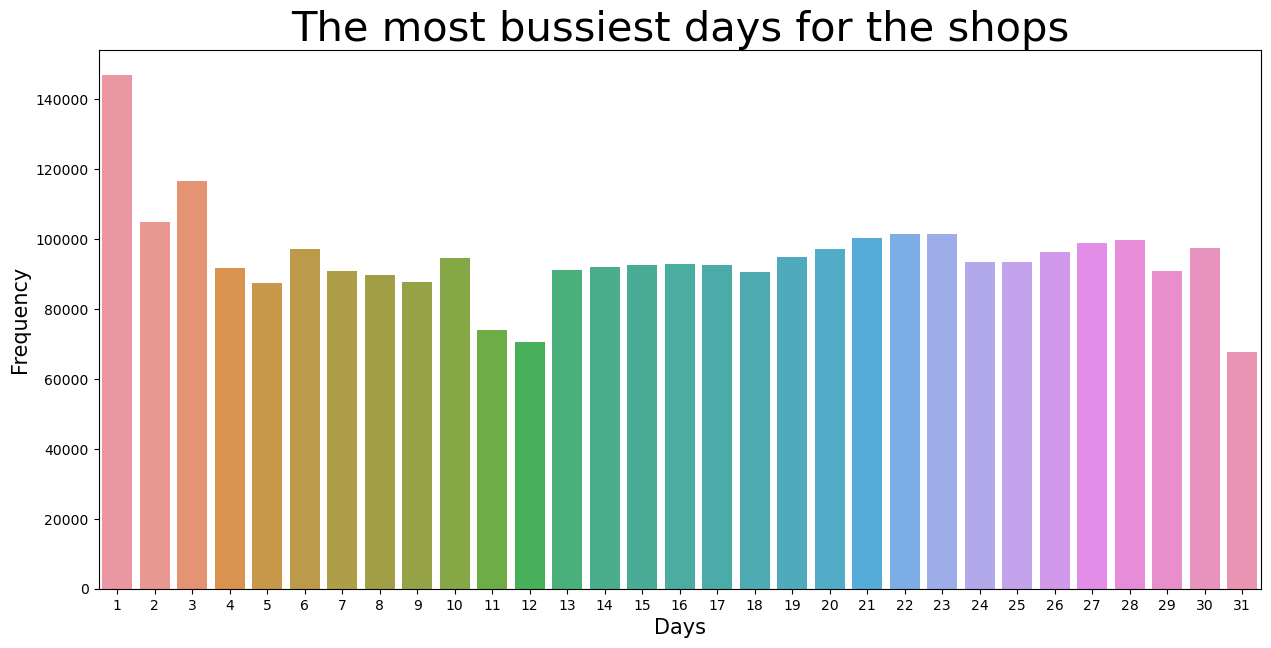

In [17]:
#plt.rcParams['figure.figsize']=(35,7)
#sns.countplot(train['day'])
#plt.show()

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(train['day'])
plt.title('The most bussiest days for the shops', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
 6   day             int64         
 7   month           int64         
 8   year            int64         
 9   week            int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 224.0 MB


/home/sahil/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


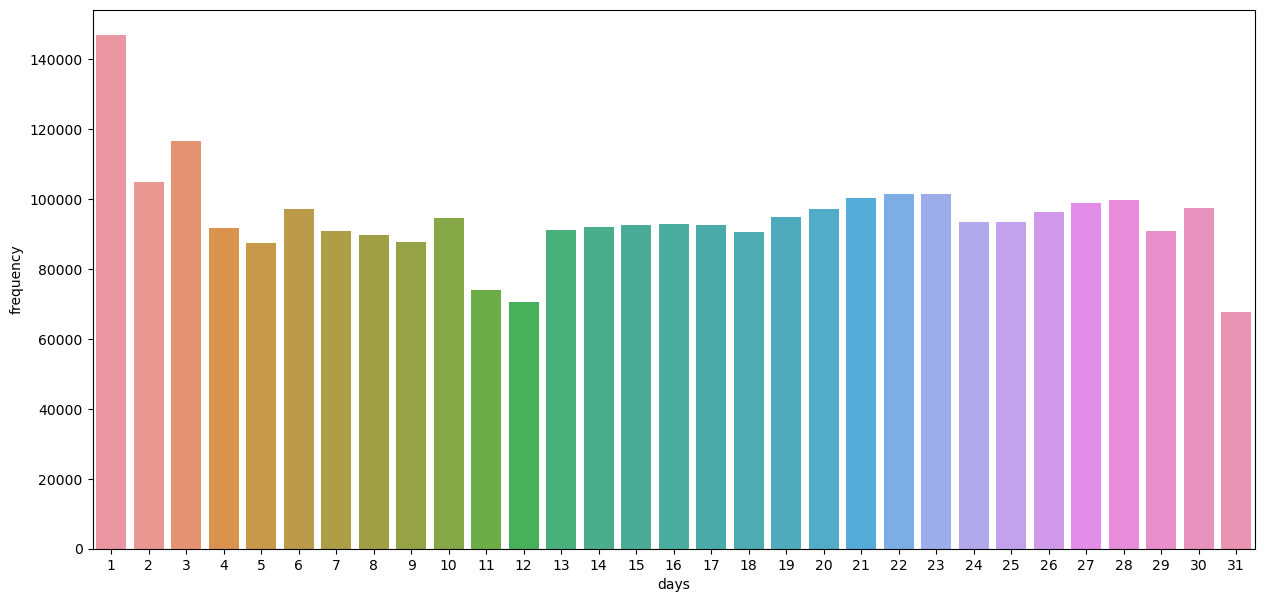

In [19]:
plt.rcParams['figure.figsize']=(15,7)
sns.countplot(train['day'])
plt.xlabel('days')
plt.ylabel('frequency')
plt.show()


/home/sahil/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


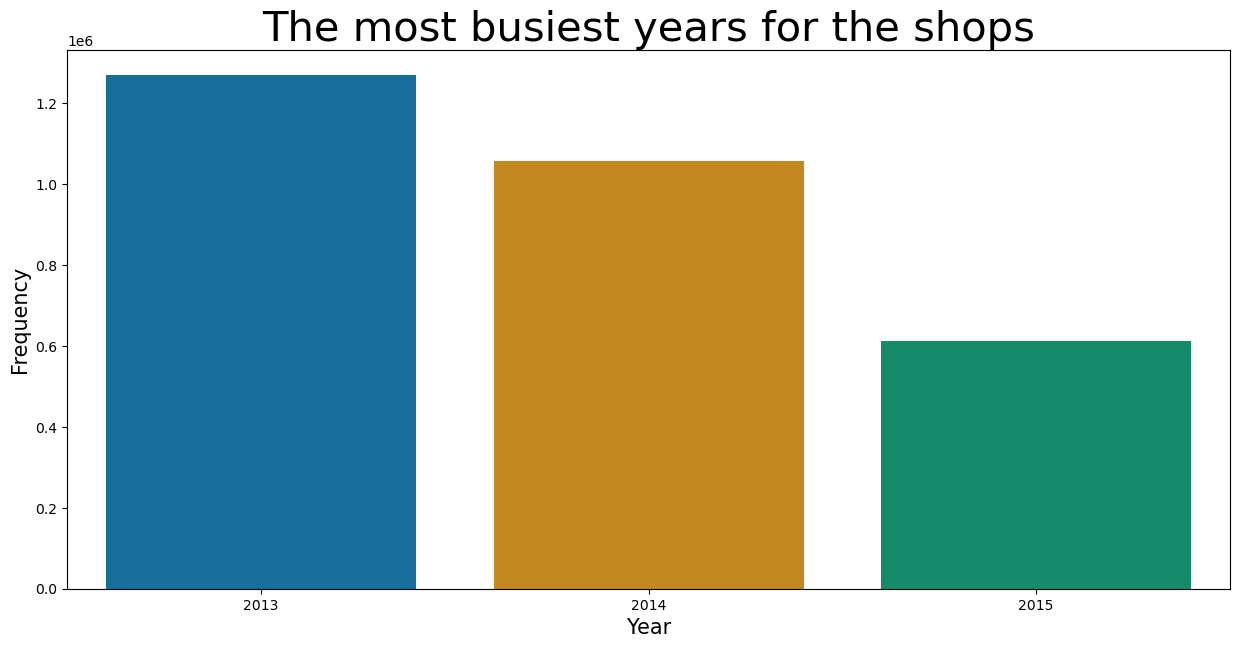

In [20]:

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(train['year'], palette = 'colorblind')
plt.title('The most busiest years for the shops', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

/home/sahil/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


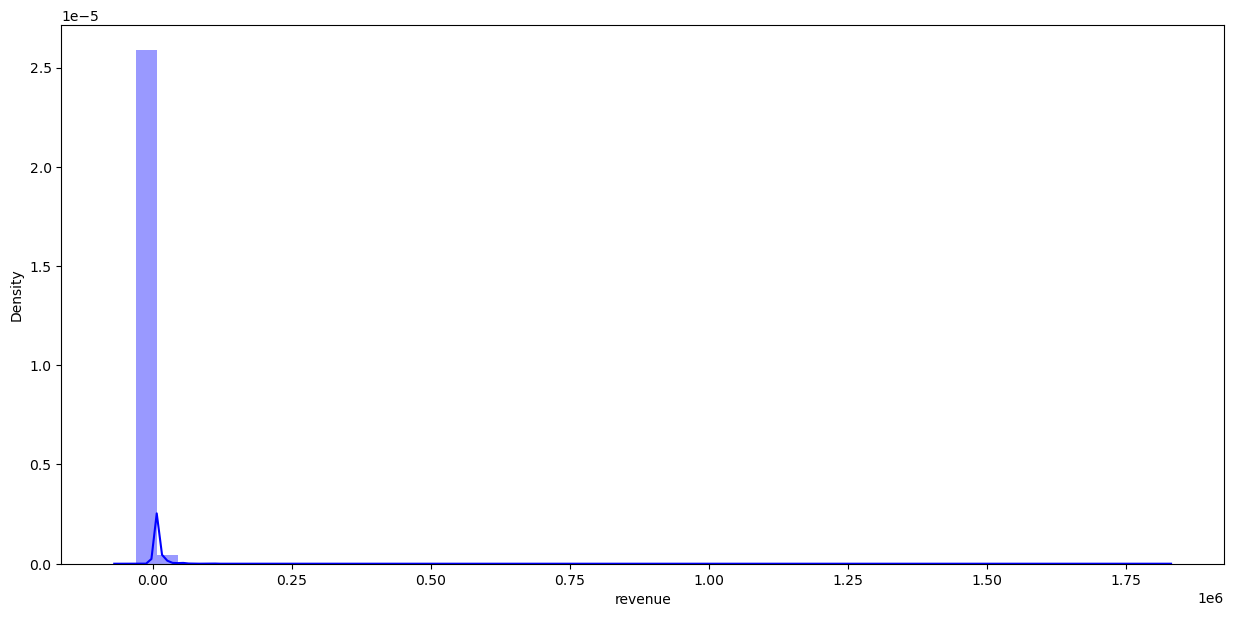

In [21]:
train['revenue']=train['item_price']*train['item_cnt_day']

plt.rcParams['figure.figsize']=(15,7)
sns.distplot(train['revenue'],color='blue')
plt.show()

#sns.distplot(train['revenue'], color = 'blue')
#plt.title('Distribution of Revenue', fontsize = 30)
#plt.xlabel('Range of Revenue', fontsize = 15)
#plt.ylabel('Revenue')
#plt.show()

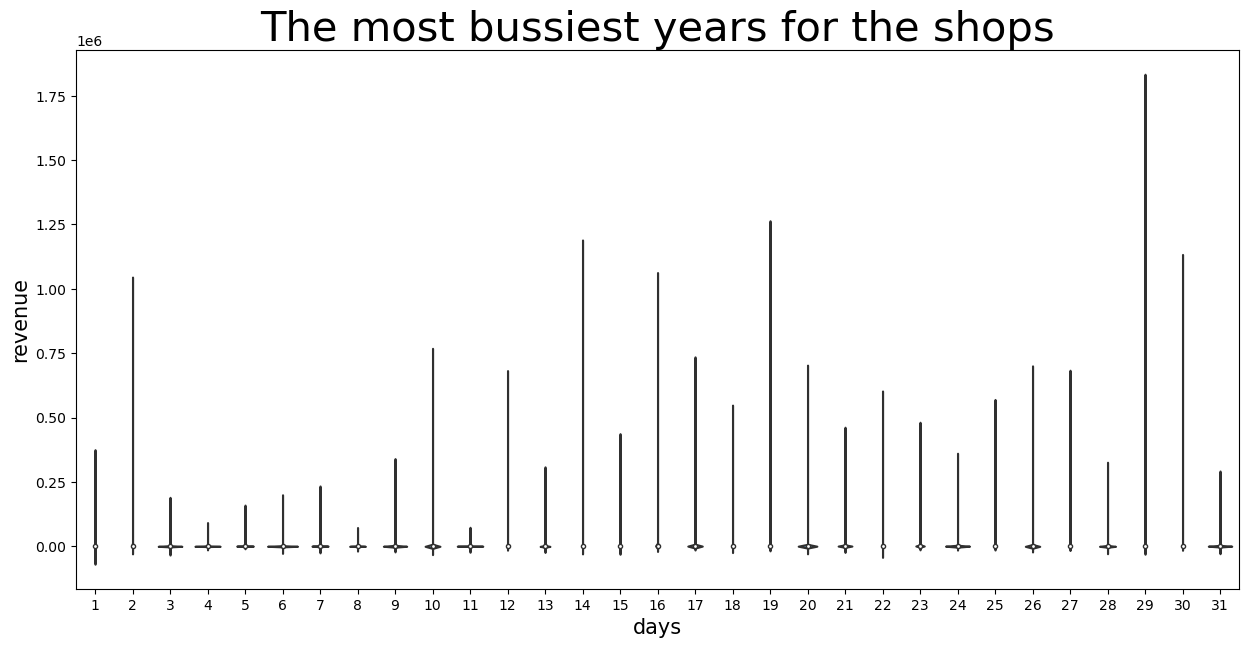

In [22]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.violinplot(x=train['day'],y=train['revenue'], palette = 'colorblind')
plt.title('The most bussiest years for the shops', fontsize = 30)
plt.xlabel('days', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)

plt.show()

/home/sahil/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


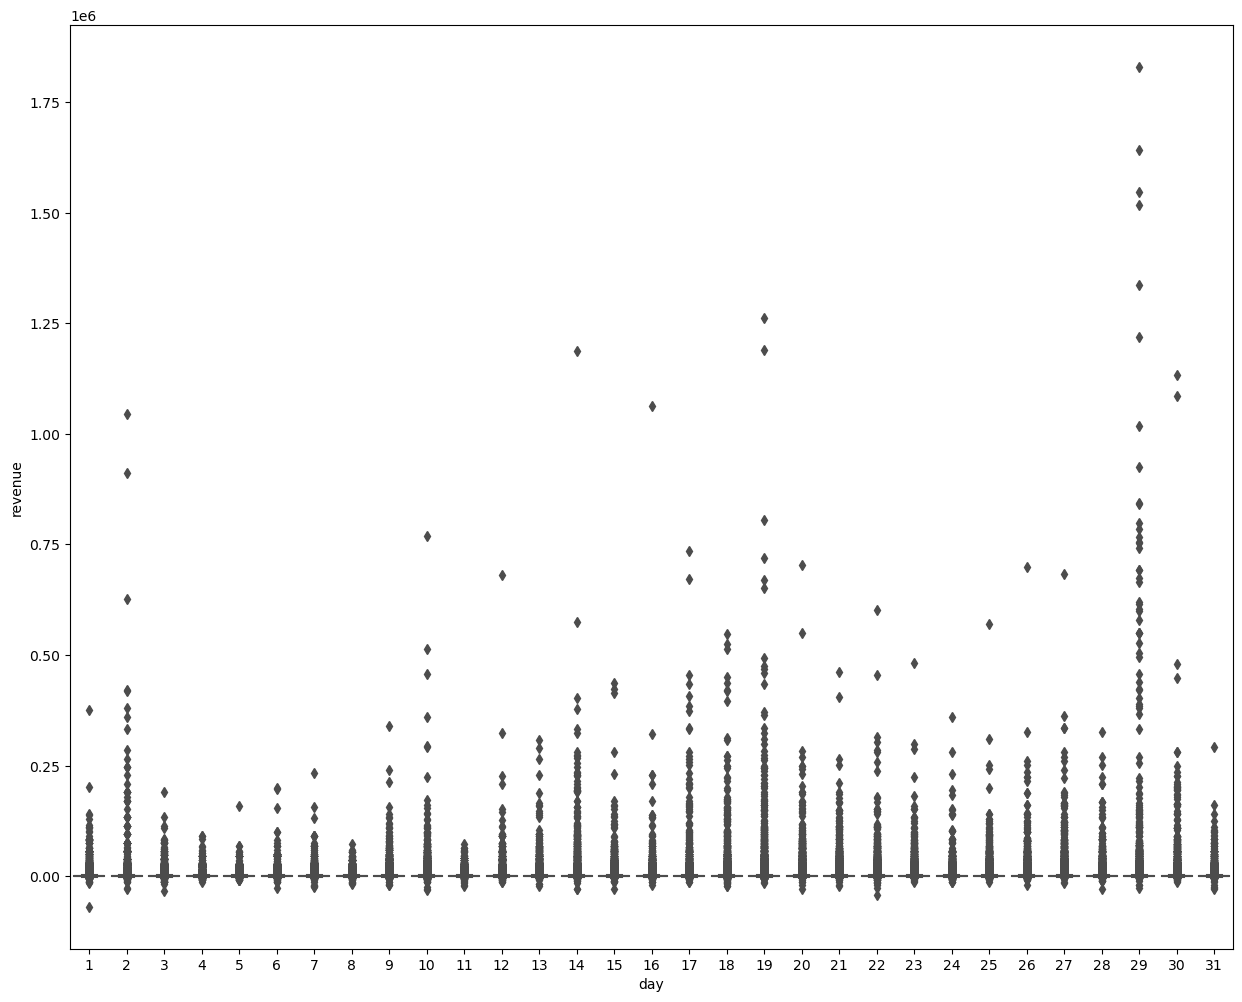

In [23]:
plt.rcParams['figure.figsize']=(15,12)

x=train['day']
y=train['revenue']
sns.boxplot(x,y,color='blue')
plt.show()


In [24]:
data = train.groupby([train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()


In [25]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week,revenue
0,2013-02-01,0,59,22154,999.00,1.0,1,2,2013,5,999.00
1,2013-03-01,0,25,2552,899.00,1.0,1,3,2013,9,899.00
2,2013-05-01,0,25,2552,899.00,-1.0,1,5,2013,18,-899.00
3,2013-06-01,0,25,2554,1709.05,1.0,1,6,2013,22,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,3,1099.00
5,2013-10-01,0,25,2564,349.00,1.0,1,10,2013,40,349.00
6,2013-02-01,0,25,2565,549.00,1.0,1,2,2013,5,549.00
7,2013-04-01,0,25,2572,239.00,1.0,1,4,2013,14,239.00
8,2013-11-01,0,25,2572,299.00,1.0,1,11,2013,44,299.00
9,2013-03-01,0,25,2573,299.00,3.0,1,3,2013,9,897.00


In [26]:
data.head(4)

,date,item_id,shop_id,date_block_num,item_price,item_cnt_day,day,month,year,week,revenue
0,2013-01,27,5,7,1198.0,1.0,8,1,2013,2,1198.0
1,2013-01,27,10,0,1890.0,1.0,19,1,2013,3,1890.0
2,2013-01,27,31,0,2499.0,1.0,18,1,2013,3,2499.0
3,2013-01,28,15,0,549.0,1.0,14,1,2013,3,549.0


In [27]:
data=data[['date','item_id','shop_id','item_cnt_day']]
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

In [28]:
data.head()

date,item_id,shop_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [30]:
test = pd.merge(test, data, on = ['item_id', 'shop_id'], how = 'left')
test.fillna(0, inplace = True)

test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
x_train=data.drop(['2015-10','shop_id','item_id'],axis=1)
y_train=data['2015-10']

x_test=data.drop(['2013-01','shop_id','item_id'],axis=1)

In [34]:
x_test.shape

(424124, 35)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)



In [46]:
#from lightgbm import LGBMRegressor

#model_lgb = LGBMRegressor( n_estimators=200,
                           

#model_lgb.fit(x_train, y_train)
#y_pred_lgb = model_lgb.predict(x_test).clip(0., 20.)


#y_pred_lgb = model_lgb.predict(x_test)
from sklearn.linear_model import LogisticRegression
#rom sklearn.metrics import accuracy_score

logistic = LogisticRegression() 
model = logistic.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9188770999115826


/home/sahil/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
